# 차원 축소

**차원/특성** \
분석하는 데이터의 종류의 수\
→ 하나의 변수는 하나의 차원을 의미한다. 4개의 독립변인들이 하나의 공간에 표현되기 위해서는 그 공간이 4차원이어야 한다. 

**차원 축소** \
: 원본 데이터의 특성(차원)을 적은 수의 새로운 특성(차원)으로 변환하는 비지도 학습의 한 종류

특성/차원이 많을 경우, "차원의 저주" 문제
- 표본의 밀도 떨어짐
- 훈련 데이터에 쉽게 과대적합 overfitting 위험
- 낮은 모델 성능
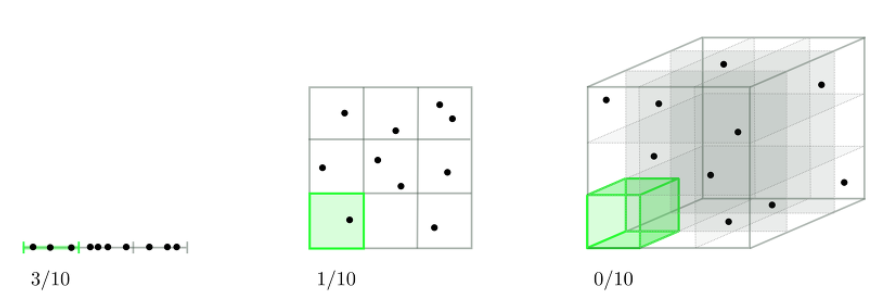

__목적__\
차원을 줄인다면,
- 데이터셋의 크기를 줄일 수 있어 해석력 확보 & 비교적 시각화가 쉬움
- 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능 높이거나 훈련 속도 빠르게 만들 수 있음


__예시__

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
df=pd.DataFrame(iris.data,columns=columns)
df['target']=iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


_만약, 2개의 변수로도 4개(전체)의 변수의  분산에 대해 설명할 수 있다면 target을 분류할 때 2개만 사용하면 되지 않을까?_

__대표적인  차원 축소 알고리즘__
1. **주성분 분석 Principal Component Analysis**
2. **요인 분석 Factor Analysis**

# 주성분 분석 PCA

## 개념

**주성분 분석 PCA** \
: 고차원 데이터를 기존의 분산을 최대한 보존하는 선형 독립의 새로운 변수들로 변환\
: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원 축소

- ※ PCA는 단순히 주성분 분석이 아니라, 주성분이 될 수 있는 형태로 기존데이터에 변환을 가하는 것

**분산을 최대한 보존한다는 게 무슨 뜻?**\
: PCA의 핵심은 데이터를 축에 사영했을 때 가장 높은 분산을 가지는 데이터의 축을 찾는것\
 -> 그 축으로 차원을 축소! **이 축 = 주성분**
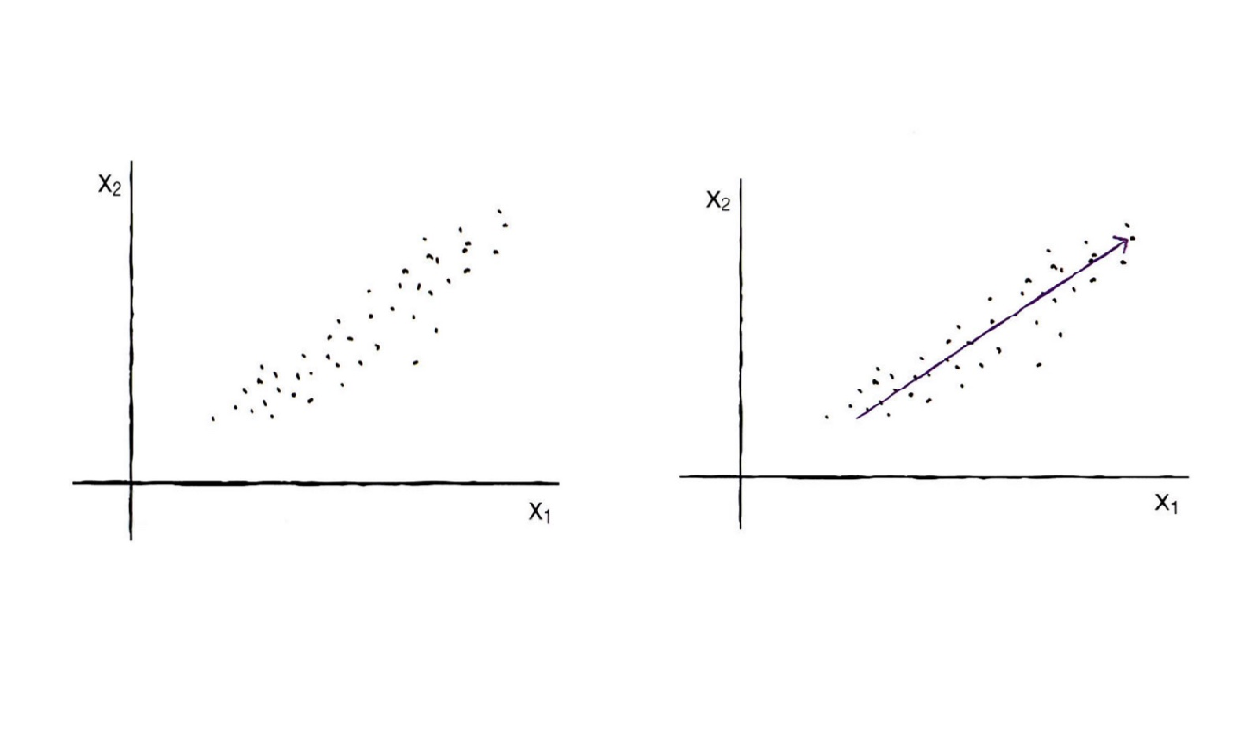


**분산** (= 변산성 = 차이) \
: 데이터가 담고 있는 가장 유용한 정보인 "차이"에 대한 정보
-  축에 사영했을 때,\
분산이 크다 = 원래 데이터의 분포를 잘 설명할 수 있다 = 정보 손실 최소화

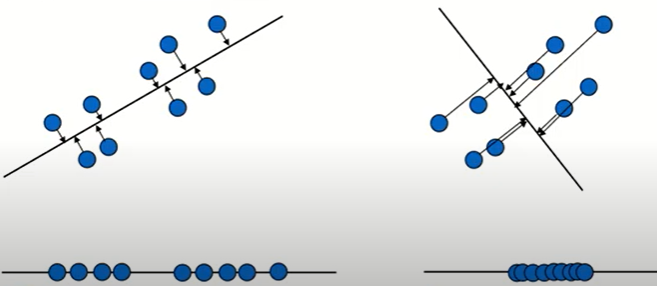


## PCA 과정

1. 제일 먼저 가장 큰 분산을 기반으로 첫 번째 축을 생성
2. 두 번째 축은 이 벡터 축에 수직이고 분산이 가장 큰 다음 방향을 찾음
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 축으로 설정하는 방식으로 축을 생성

이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소
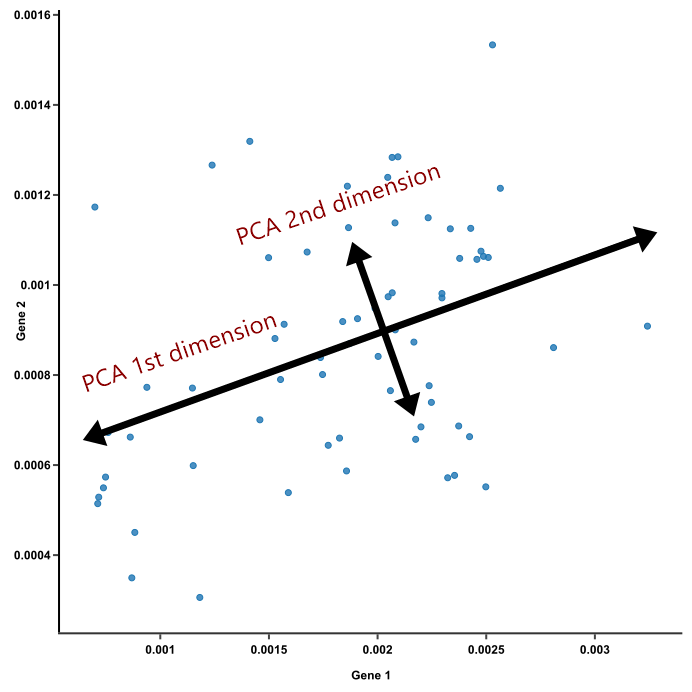


왜 직각이 되는 벡터를 다음 축으로? \
참고: https://gentlej90.tistory.com/15

__[선형대수 관점]__

1. 데이터 정규화/표준화
2. 입력 데이터 세트의 공분산 행렬을 계산
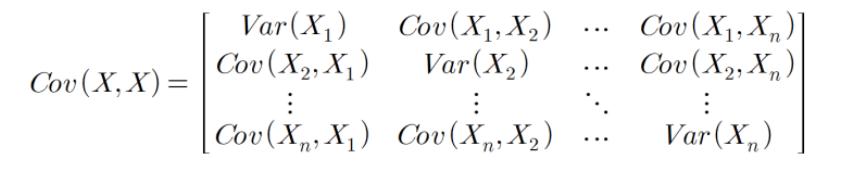
3. 공분산 행렬을 고유값 분해해서 고유벡터eigenvector와 고유값eigenvalue을 구한다.
- 공분산의 고유벡터eigenvector : 전체 데이터가 어느 방향으로 분산 되어 있는지를 보여줌. 
- 공분산의 고유값eigenvalue : 고유벡터의 크기를 의미.
4. 지정된 최소 분산 크기 이상을 설명하도록, 고유값eigenvalue이 큰 순대로 K개의 변환 차수만큼 고유벡터eigenvector를 추출 (이게 우리의 __'주성분'__)
- 고유값이 크다? => 각각의 고유값이 해당하는 고유벡터의 방향만큼 어느 정도로 분산되어 있는지를 보여준다. 따라서 고유 값이 큰 순서대로 주성분 분석을 시행한다.<br>
5. 고유벡터eigenvector에 입력 데이터를 선형 변환하여 새로운 저차원의 데이터 얻기 !

**고유값 분해**

고유값이 고유벡트의 크기를 나타내고 입력 데이터의 분산을 나타냄

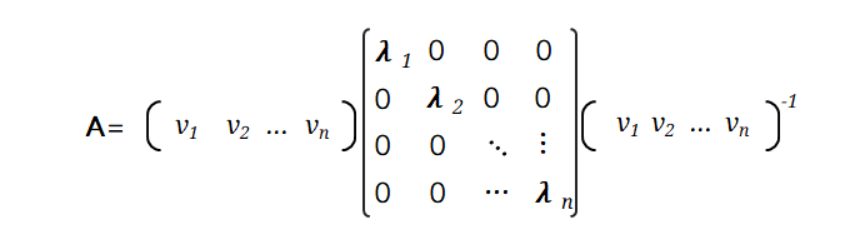 

- v1, v2 ... vn : 고유벡터 eigenvector
- λ1, λ2 ... λn : 고유값 eigenvalue

v1이 가장 분산이 큰 방향을 가진 고유벡터이고 v2는 v1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터

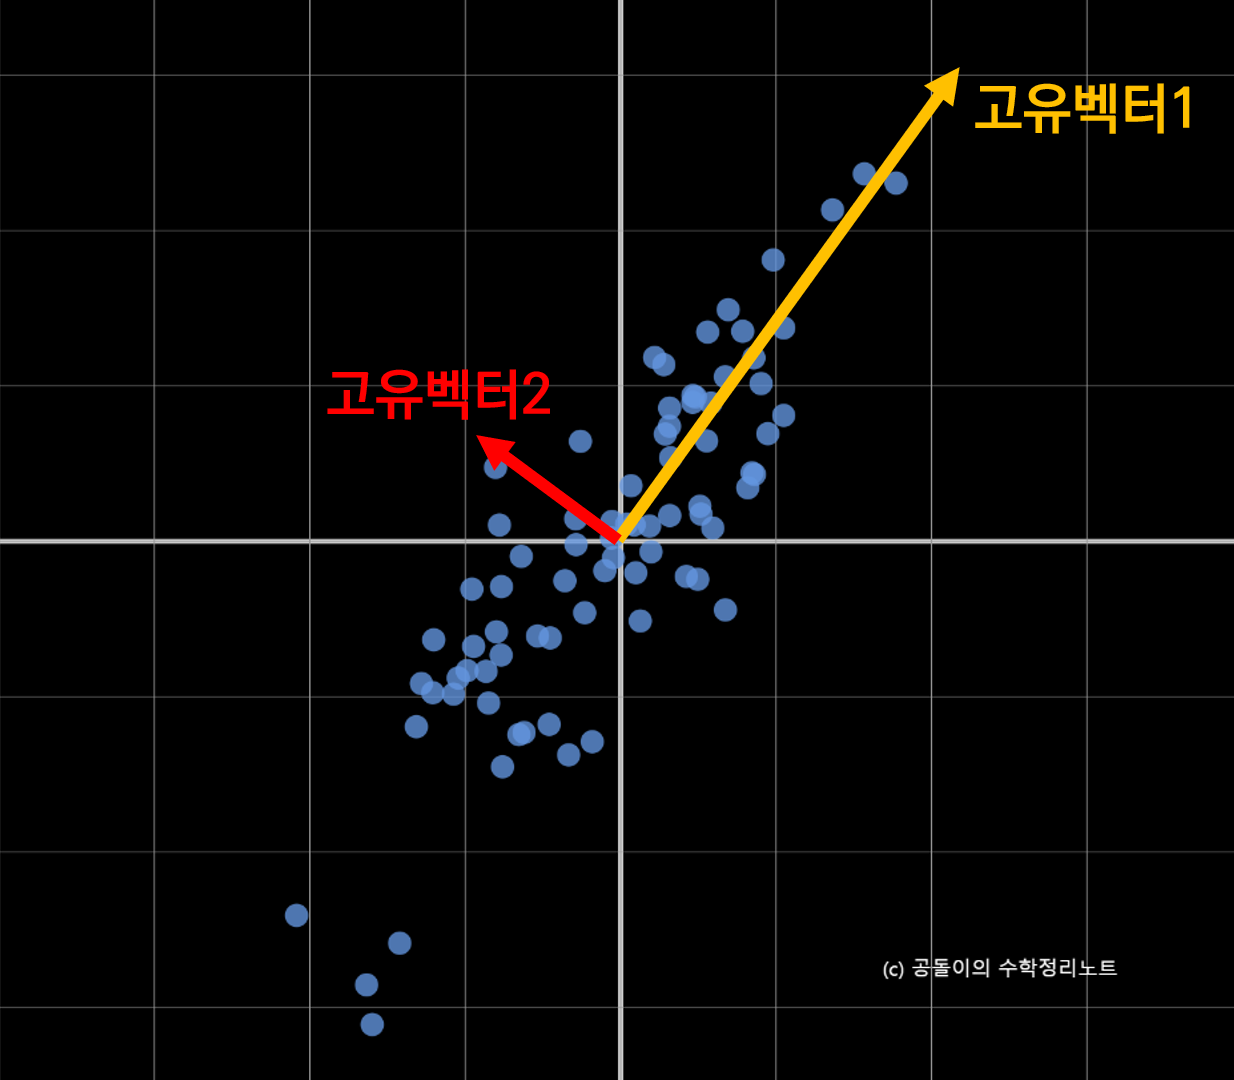

> 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA

<br>

__주성분 개수 결정__
1. 성분들이 설명하는 분산 비율이 70~90% 사이 가되는 주성분 개수 선택
2. 고유값(eigenvalue) > 1 인 주성분만 사용


출처
- https://angeloyeo.github.io/2019/07/27/PCA.html
- https://casa-de-feel.tistory.com/19

## PCA 실행

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
df=pd.DataFrame(iris.data,columns=columns)
df['target']=iris.target
df.head()
# 0은 setosa, 1은 versicolor, 2는 virginica

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


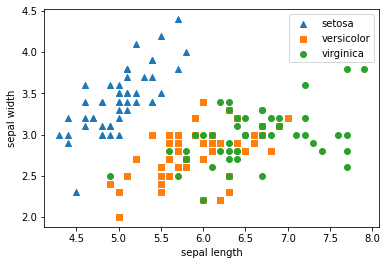

In [2]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=df[df['target']==i]['sepal_length']
    y_axis_data=df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


- scale을 하지 않으면 변인이 가진 값의 크기에 따라 설명 가능한 분산량이 왜곡될 수 있기 때문에 반드시 표준화를 해주어야 한다. 
- 설명 가능한 분산량이 왜곡됨에 따라 모델 성능이 저하될 수 있음

참고 :https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pcaComponents = pca.fit_transform(x) # 차원 축소

# 주성분으로 이루어진 데이터 프레임 구성
principalDf = pd.DataFrame(data=pcaComponents, columns = ['pca_component1', 'pca_component2'])
principalDf['target']=iris.target
principalDf.head()

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


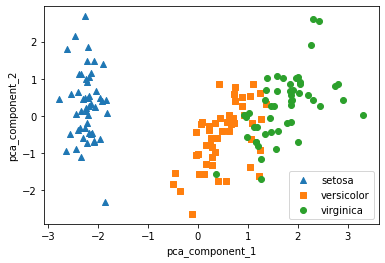

In [5]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=principalDf[principalDf['target']==i]['pca_component1']
    y_axis_data=principalDf[principalDf['target']==i]['pca_component2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [6]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

-> 원본 데이터의 96%를 설명!

## 주성분 개수 정하기

__1. 전체에서 해당 주성분의 고윳값이 차지하는 분산의 비율 (70~90%)__

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#target 빼고 모든 열 가져오기
data=df[df.columns[0:4]]

#모든 성분을 주성분으로 pca
pca_all=PCA(n_components=len(df.columns)-1)
pca_all_fit = pca_all.fit_transform(x)

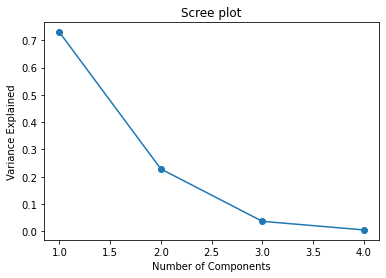

In [9]:
#Scree plot
value_number = np.arange(pca_all.n_components) + 1
plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.plot(value_number, pca_all.explained_variance_ratio_, 'o-')

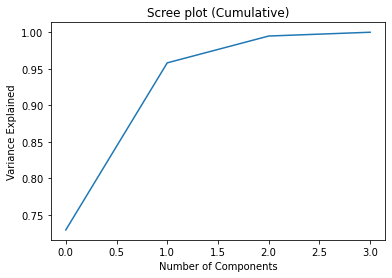

In [10]:
plt.title('Scree plot (Cumulative)')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))

__2. Eigenvalue > 1__

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#Covariance Matrix
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


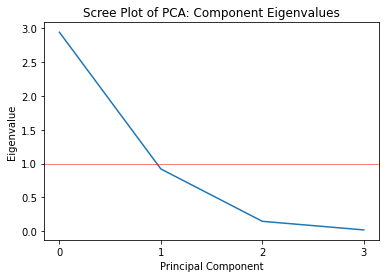

In [20]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca_all.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

참고
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://casa-de-feel.tistory.com/19
- https://jmausolf.github.io/code/pca_in_python/

# 요인분석 Factor Analysis

## 개념

**요인분석 (Factor Analysis)**\
여러개의 서로 관련이 있는 변수들로 측정된 자료에서 그 변수들을 설명할 수 있는 새로운 공통변수(__잠재변수;Latent Variable__)를 파악하는 통계적 분석방법 <br><br>
(ex) 시험 성적이 __수학/과학/영어/중국어/독어/작곡/연주__ 의 점수 (0~100점)으로 구성되어 있다고 하면, \
<수학, 과학>이 상관관계 (수리계산능력) \
<영어, 중국어, 독어>가 상관관계 (외국어능력) \
<작곡, 연주>가 상관관계 (음악적 능력) \
있을 것임

- 다수의 변수들을 대상으로 변수들 간의 관계 분석 (타당성 분석)
- 공통 차원으로 축약하는 통계기법- 변수 축소 (유사성 가진 데이터 하나로 묶음)

++ 참고 \
요인 분석은 시장 조사, 광고, 심리학, 금융 및 운영 연구에 널리 사용됩니다. 시장 조사원은 요인 분석을 사용하여 가격에 민감한 고객을 식별하고 소비자 선택에 영향을 미치는 브랜드 기능을 식별하며 유통 채널에 대한 채널 선택 기준을 이해하는 데 도움을 줍니다.

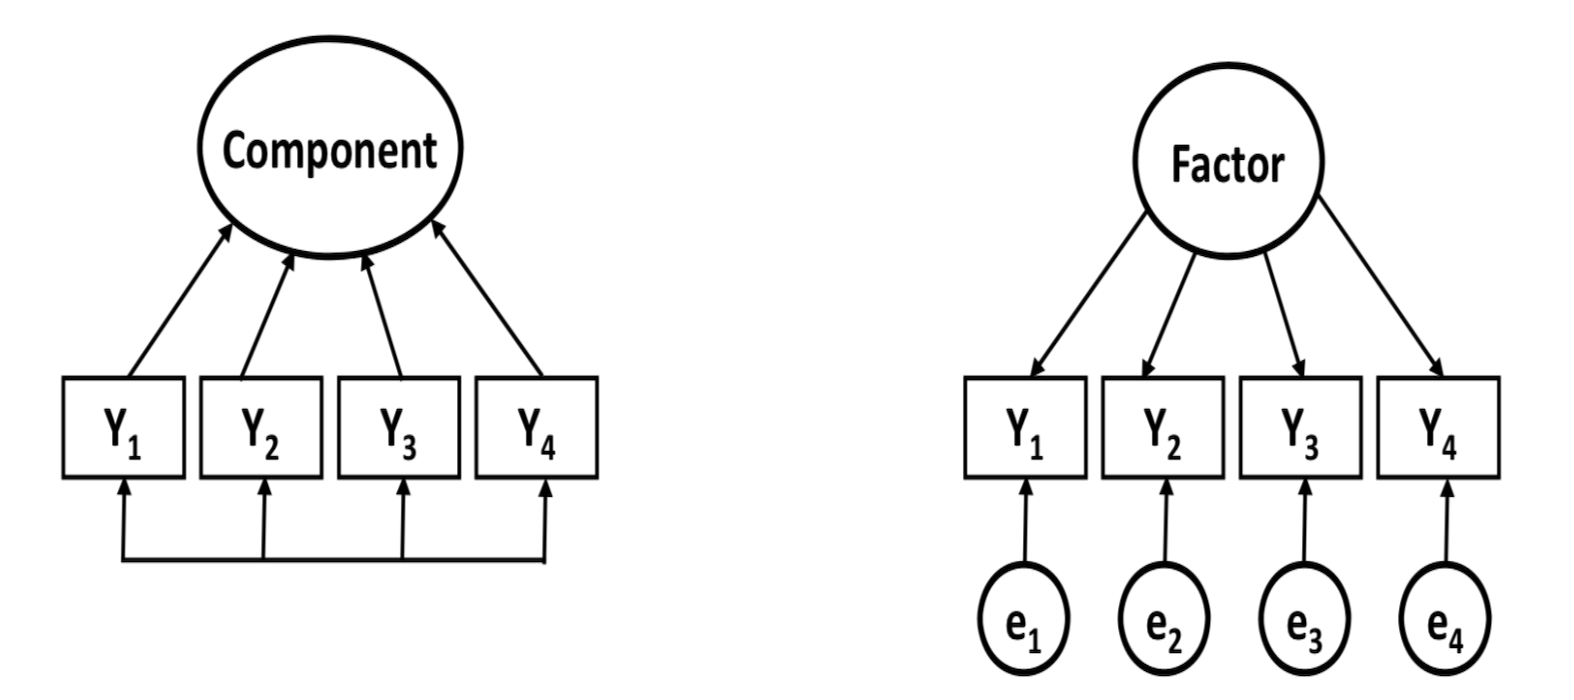

__[PCA와 FA 비교]__

공통점

- 관측된 여러개의 변수들로 부터 소수의 새로운 변수들을 생성한다.

- 차원 축소의 방법으로 활용한다.



차이점

- __생성되는 변수들의 관계__

    PCA : 변수간의 중요성이 있다. 주로 제1주성분, 제2주성분 등으로 구분된다.  변수간의 순서가 주어진다.

    FA : 변수들은 기본적으로 대등한 관계를 갖는다. 어떤것이 더 중요하다는 것이 없다. 변수간의 순서가 없다.
    

- __생성되는 변수의 의미 (이름)__

    PCA : 의미 중심이라기보다는 분류 결정력이 높은 임의의 변수를 만든 것이기에 이름 붙이기 어려움
    
    FA : 분석가가 적절한 이름을 붙일 수 있음, 서로 상관있는 변수들의 이름 지을 수 있음
    

- __분석방법의 의미__

    PCA : 목표 변수를 잘 분류하기 위해 변수들의 선형 결합에 의해 새로운 변수를 만든다.

    FA : 데이터가 주어지면 이에 대한 가공 인자들을 만들어 인자들간의 선형 결합으로 표현한다.




__[요인분석의 종류]__

1. 탐색적 요인분석(EFA;Exploratory Factor Analysis): 사전에 어떤 변수들끼리 묶어야 한다는 전제를 두지 않고 분석하는 방법 (개입X), 변수 압축이 목적
2. 확인적 요인분석(CFA;Confirmatory Factor Analysis): 사전에 묶여질 것으로 기대되는 항목끼리 묶여지는지를 분석하는 방법 (개입O), 가설/모델의 검증이 목적

가장 큰 차이: __데이터에 대한 가정을 내리고 그를 검증하는 통계 모델 여부__



__[주성분 개수 결정]__

고유값(eigenvalue) > 1 인 주성분만 사용


## 요인분석 과정

1. 요인분석 수행 전 "인수 분해성 (샘플링 적절성)" 확인
2. 변수 간의 __상관(또는 공분산)행렬__로부터 요인의 수 결정 → PCA와 같은 분산분할방법 사용 (고유값eigenvalue로 판단)
3. 해석하기 쉽게 회전시킴 (=Factor Rotation)
4. 요인 적재량(Factor Loading)을 이용해 요인을 이루는 항목 선택
5. 새롭게 생성(결정)된 잠재변수에 이름label 부여

++ 요인 회전을 시키는 방법

- 직교회전(Orthogonal rotation): VARIMAX, QUARTIMAX (요인 간 상관 없음을 전제)

- 사교회전/비직교회전(oblique rotation): PROMAX,COVARIMIN, QUARTIMIN, OBLIMIN (요인 간 상관 있음을 전제)

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df= pd.read_csv("bfi.csv", index_col=0,)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [16]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows

df.dropna(inplace=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


__[요인성 Factorability 확인]__ \
요인성 = 인수 분해성 = 샘플링 적절성 = 데이터 세트에서 요인을 찾을 수 있습니까?!

- Bartlett의 테스트
- Kaiser-Meyer-Olkin 테스트


In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869247, 0.0)

In [25]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8485397221949222

__[요인 수 선택]__

__Eigenvalue > 1__

In [19]:
# factor analysis 객체 생성
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
pd.DataFrame(eigen_values, columns=['Original_Eigenvalues'])

,Original_Eigenvalues
0,5.134311
1,2.751887
2,2.142702
3,1.852328
4,1.548163
5,1.073582
6,0.839539
7,0.799206
8,0.718989
9,0.688089


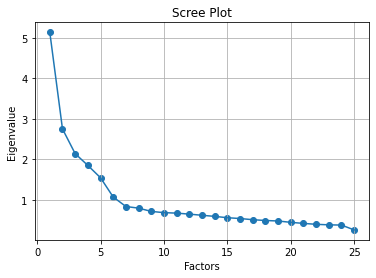

In [20]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

6 개의 요인 (또는 관측되지 않은 변수) 만 선택하면됨을 의미

__[요인분석 수행]__

In [21]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation='varimax')
fa.fit(df)
result=pd.DataFrame(fa.loadings_,index=df.columns,columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6'])
result

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


<AxesSubplot:>

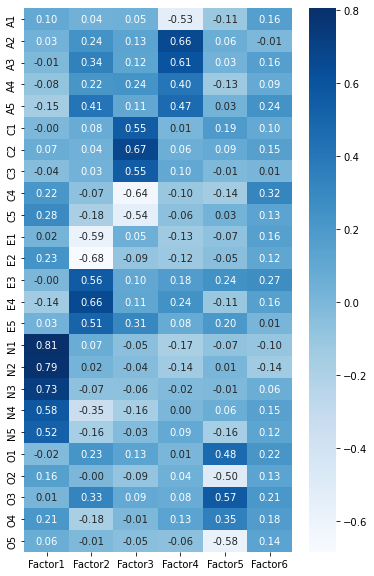

In [22]:
plt.figure(figsize=(6,10))
sns.heatmap(result, cmap="Blues", annot=True, fmt='.2f')

- 요인 1는 N1, N2, N3, N4 및 N5에 대해 높은 요인 적재를가집니다 (Neuroticism 신경성).
- 요인 2는 E1, E2, E3, E4 및 E5에 대해 높은 요인 적재를가집니다 (Extraversion 외향성).
- 요인 3에는 C1, C2, C3, C4 및 C5에 대해 높은 요인 적재가 있습니다 (Conscientiousness 성실성).
- 요인 4에는 A1, A2, A3, A4 및 A5에 대해 높은 요인 적재가 있습니다 (Agreeableness 호감도).
- 요인 5에는 O1, O2, O3, O4 및 O5에 대해 높은 요인 적재가 있습니다 (Opennness 개방성).
- 요인 6에는 변수에 대해 높은 적재가 없으며 쉽게 해석 할 수 없음

=> 5 가지 요소만 취해도 됨

In [23]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation='varimax')
fa.fit(df)
final_result=pd.DataFrame(fa.loadings_,index=df.columns,columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])
final_result

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


<AxesSubplot:>

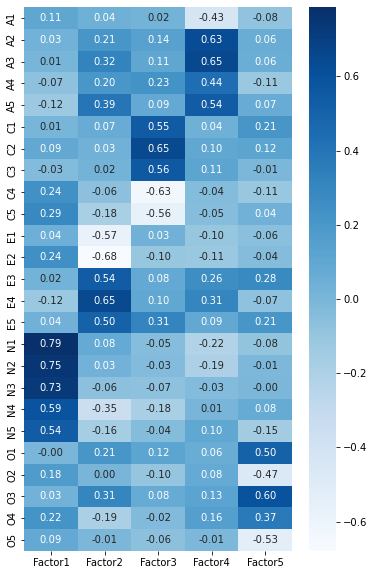

In [24]:
plt.figure(figsize=(6,10))
sns.heatmap(final_result, cmap="Blues", annot=True, fmt='.2f')

In [57]:
pd.DataFrame(fa.get_factor_variance(),index=['SS Loadings','Proportion Variance','Cumulative Variation'],
             columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Variance,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Variation,0.108385,0.207309,0.288953,0.362733,0.423619


참고
- https://dodonam.tistory.com/310
- https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729